Генотерапия позволяет корректировать работу дефективного гена, ответственного за развитие заболевания. В эксперименте сравнивалась эфективность четырех различных типов терапии.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm # для проверки гипотезы
from statsmodels.formula.api import ols

In [2]:
gen = pd.read_csv('genetherapy.csv')
gen.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   expr     60 non-null     int64 
 1   Therapy  60 non-null     object
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


У нас есть 4 типа терапии A, B, C, D. Это номинативная переменная (Therapy)

В качестве зависимой переменной будет выступать экспресии гена(expr).

Перед началом расчетов, посмотрим количество участников в каждой из 4 групп.

In [3]:
# Подсчет количества в каждой группе
counts = gen['Therapy'].value_counts()
counts

A    15
B    15
C    15
D    15
Name: Therapy, dtype: int64

In [4]:
# Создаем новый DataFrame
df = pd.DataFrame(counts).reset_index()

# Переименовываем столбцы
df.columns = ['Therapy', 'Count']

df

,Therapy,Count
0,A,15
1,B,15
2,C,15
3,D,15


В каждой группе равное количество человек, посчитаем среднее в каждой группе.

In [5]:
filtered_df_a = gen[gen['Therapy'] == 'A'] #
average_a = round(filtered_df_a['expr'].mean(),1) #
filtered_df_b = gen[gen['Therapy'] == 'B']
average_b = filtered_df_b['expr'].mean()
filtered_df_c = gen[gen['Therapy'] == 'C']
average_c = filtered_df_c['expr'].mean()
filtered_df_d = gen[gen['Therapy'] == 'A']
average_d = round(filtered_df_d['expr'].mean(),1)
print('Среднее в группе А:',average_a)
print('Среднее в группе B:',average_b)
print('Среднее в группе C:',average_c)
print('Среднее в группе D:',average_d)

Среднее в группе А: 99.7
Среднее в группе B: 98.8
Среднее в группе C: 94.4
Среднее в группе D: 99.7


In [6]:
# Создаем DataFrame с полученными значениями
average_df = pd.DataFrame({
    'Therapy': ['A', 'B', 'C', 'D'],
    'Average': [average_a, average_b, average_c, average_d]
})

average_df

,Therapy,Average
0,A,99.7
1,B,98.8
2,C,94.4
3,D,99.7


После подсчета среднего в каждой группе, посчитаем стандартное отклонение.

In [7]:
standard_deviation_a = round(np.std(filtered_df_a),1)
standard_deviation_b = round(np.std(filtered_df_b),1)
standard_deviation_c = round(np.std(filtered_df_c),1)
standard_deviation_d = round(np.std(filtered_df_d),1)
print('Стандартное отклонение в группе А:', standard_deviation_a)
print('Стандартное отклонение в группе B:', standard_deviation_b)
print('Стандартное отклонение в группе C:', standard_deviation_c)
print('Стандартное отклонение в группе D:', standard_deviation_d)

Стандартное отклонение в группе А: expr    4.0
dtype: float64
Стандартное отклонение в группе B: expr    5.7
dtype: float64
Стандартное отклонение в группе C: expr    5.0
dtype: float64
Стандартное отклонение в группе D: expr    4.0
dtype: float64


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return std(axis=axis, dtype=dtype, out=out, ddof=ddof, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3643: FutureWarning: The default value of numeric_only in DataFrame.std is deprecated. In a future version

In [8]:
# Создаем DataFrame с полученными значениями
standard_df = pd.DataFrame({
    'Therapy': ['A', 'B', 'C', 'D'],
    'standard_deviation': [standard_deviation_a, standard_deviation_b, standard_deviation_c, standard_deviation_d]
})

standard_df

,Therapy,standard_deviation
0,A,expr 4.0 dtype: float64
1,B,expr 5.7 dtype: float64
2,C,expr 5.0 dtype: float64
3,D,expr 4.0 dtype: float64


In [9]:
# Соединяем все три DataFrame в один
result = df.merge(average_df, on=['Therapy'], how='inner')
result = result.merge(standard_df, on=['Therapy'], how='inner')
result

,Therapy,Count,Average,standard_deviation
0,A,15,99.7,expr 4.0 dtype: float64
1,B,15,98.8,expr 5.7 dtype: float64
2,C,15,94.4,expr 5.0 dtype: float64
3,D,15,99.7,expr 4.0 dtype: float64


Сформулируем нашу гипотезу

H0 - в генеральной совокупности средний уровень экспрессии генов будет одинаковый при использовании всех четырех типов терапии.

Что бы отклонить эту гипотезу, мы будем использовать однофакторный дисперсионный анализ. В кчестве этого фактора выступает тип терапии.

In [10]:
# определите модель
model = ols('expr ~ C(Therapy)', data=gen).fit()

# проведите анализ
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table
#В этом коде функция ols() из statsmodels.formula.api используется для определения модели.
#'expr ~ C(Therapy)' - это формула, описывающая модель,
# где 'expr' - это зависимая переменная, а 'Therapy' - независимая переменная.
# 'C(treatment)' означает, что 'Therapy' должна быть рассмотрена как категориальная переменная.
#anova_lm() проводит сам дисперсионный анализ.

,sum_sq,df,F,PR(>F)
C(Therapy),560.716667,3.0,8.037302,0.000152
Residual,1302.266667,56.0,NaN,NaN


###Наш вывод является результатом однофакторного дисперсионного анализа (ANOVA). Вот что означают столбцы:#
- C(Therapy): Это обозначает, что групповой фактор в вашем анализе - это 'Therapy'.
- sum_sq: Это сумма квадратов. Для C(Therapy) это сумма квадратов межгруппового варианта, а для Residual это сумма квадратов внутригруппового варианта.
- df: Это степени свободы. Для C(Therapy) это количество групп минус 1, а для Residual это общее количество наблюдений минус количество групп.
- F: Это F-статистика. Это отношение межгруппового среднего квадрата к внутригрупповому среднему квадрату. Большое значение F указывает на то, что межгрупповые различия значительны.
- PR(>F): Это p-значение. Это вероятность получить наблюдаемое значение F (или более экстремальное) при условии, что нулевая гипотеза верна (то есть, нет различий между группами). Маленькое p-значение (обычно меньше 0.05) указывает на то, что вы можете отвергнуть нулевую гипотезу.

### Исходя из нашего вывода, p-значение меньше 0.05, что указывает на значимые различия между группами. Это означает, что эффект терапии (A, B, C, D) значимо влияет на исследуемую переменную и позволяет отклонить H0.

*ANOVA проверяет общую разницу между группами и не сообщает, какие группы конкретно отличаются друг от друга. В нашем случае  требуется дополнительно провести тесты пост-анализа,такие как тест Тьюки, чтобы определить, группы с какими значениями отличаются.*



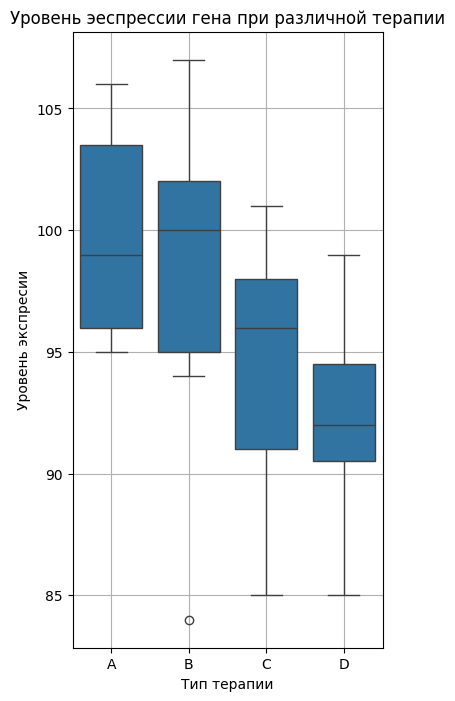

In [11]:
# Задаем размер фигуры
plt.figure(figsize=(4, 8))

# Создаем бокс-плот
sns.boxplot(x='Therapy', y='expr', data=gen)

# Добавляем подписи к осям
plt.xlabel('Тип терапии')
plt.ylabel('Уровень экспресии')
# Добавляем название графика
plt.title('Уровень эеспрессии гена при различной терапии')

# Добавляем сетку
plt.grid(True)

# Отображаем график
plt.show()